<a href="https://colab.research.google.com/github/Sandoval-Martinez-Jacquelin/Metodos-1/blob/main/Polinomio%20interpolante%20de%20Newton%20con%20SYMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POLINOMIO INTERPOLANTE DE NEWTON CON SYMPY**

In [3]:
import numpy as np
from numpy import array

from numpy import zeros
from tabulate import tabulate
from math import *

In [4]:
#Ingreso de los datos de la columna  X
n=6#int(input("Ingrese el numero de datos "))
#datx=zeros(n) #creacion de un arreglo inicializado en ceros ,para añadir los datos de la columna x
#for i in range(n):
  #a=input("Ingrese dato para x ")
  #datx[i]=a
datx=array([0,1,2,3,4,5])#ingreso de los datos de x para el ejemplo

In [5]:
#Ingreso de los datos de la columna  y
#daty=zeros(n)
#for i in range(n):
  #a=input("Ingrese dato para y ")
  #daty[i]=a
daty=array([-5,1,9,25,55,105])#ingreso de los datos de y para el ejemplo

In [6]:
#Imprimimos la tabla con los valores x y y dados
dic={"datox":datx,"datoy":daty}
print(tabulate(dic,headers=['X',"Y"]))

  X    Y
---  ---
  0   -5
  1    1
  2    9
  3   25
  4   55
  5  105


In [7]:
def igual(l):#definimos una funcion que devuelve True si todos los elementos de una lista son iguales
  if l.count(l[0])==len(l):
    return True
  else:
    return False


In [8]:
#Calculo de las diferencias
d=daty#guardamos los datos de la columna "y" en la variable d ,para realizar el calculo de diferencias
for i in range(1,n):#ciclo iterativo que calcula las diferencias y las guarda en una lista dentro de un diccionario,cuya clave es el numero de diferencia
  lista=np.diff(d)
  dic.update({i:lista})
  d=lista

  if igual(list(lista)) is True:#definimos un  condicional para conocer el grado del polinomio con ayuda de ka funcion "igual" definida anteriormente
    grad=i
    break#se rompe el ciclo una vez que los datos de la diferencia i son iguales,el grado del polinomio es igual a i
lista=np.diff(d)
dic.update({i+1:lista})


print(dic)#imprimimos es diccionario que contiene los datos de x,y y las diferencias


{'datox': array([0, 1, 2, 3, 4, 5]), 'datoy': array([ -5,   1,   9,  25,  55, 105]), 1: array([ 6,  8, 16, 30, 50]), 2: array([ 2,  8, 14, 20]), 3: array([6, 6, 6]), 4: array([0, 0])}


In [9]:
titulos=["X","Y"]
for z in range(1,grad+2):#Definimos los titulos para cada columna de la tabla
  titulos.append("Diferencia "+str(z))


print(tabulate(dic,headers=titulos))#Imprimimos la tabla de diferencias

  X    Y    Diferencia 1    Diferencia 2    Diferencia 3    Diferencia 4
---  ---  --------------  --------------  --------------  --------------
  0   -5               6               2               6               0
  1    1               8               8               6               0
  2    9              16              14               6
  3   25              30              20
  4   55              50
  5  105


In [10]:
#Ingreso del valor de Xk,donde deseamos evaluar el polinomio interpolante de Newton
xk=1.5#float(input("Ingrese el valor de Xk= ")) ,para esta prueba tomaremos xk=1.5
#Ingreso del valor de X0
xo=1#float(input("Ingrese el valor de x0= ")),para esta prueba elegimos xo=1
#Calculamos h
h=datx[1]-datx[0]

#Calculamos K
k=(xk-xo)/h


In [15]:
print(comb(3,1))

3.0


In [16]:
#CALCULO DE COEFICIENTES BINOMIALES
import sympy as sp
x=sp.Symbol("x")
k=sp.Symbol("k")
print(comb(x-1,1))

x - 1


In [11]:
#funcion para realizar el calculo de los coeficientes binomiales
def comb(k,j):
  c=1
  for v in range(j):
    c=c*(k-v)

  f=factorial(j)
  return c/f


In [12]:
#Calculo de los coeficientes binomiales

ind=list(daty).index(xo)#encontramos el indice de xo en el arreglo de datx(que contiene los datos de x)
yk=daty[ind]#definimos el primer sumando de Yk como Yo

for s in range(1,grad+1):
  yk+=comb(k,s)*dic.get(s)[ind]#sumamos a Yk el producto de los coeficientes binomiales con las respectivas diferencias

print("El valor de F(xk)= ",yk)#imprimimos el valor de F(xk)

def g(x):#Definimos la funcion del polinomio resultante para graficar
  return -5+7*x-2*(x**2)+x**3
x1=np.linspace(0,5,100)

El valor de F(xk)=  4.375


**Tabla de Diferencias y Grafica del Polinomio de Newton**

------------------------------------------------Tabla de diferencias y Grafica del Polinomio de Newton------------------------------------------------
  X    Y    Diferencia 1    Diferencia 2    Diferencia 3    Diferencia 4
---  ---  --------------  --------------  --------------  --------------
  0   -5               6               2               6               0
  1    1               8               8               6               0
  2    9              16              14               6
  3   25              30              20
  4   55              50
  5  105

Si Xk=  1.5 
El valor de F(xk)=  4.375 



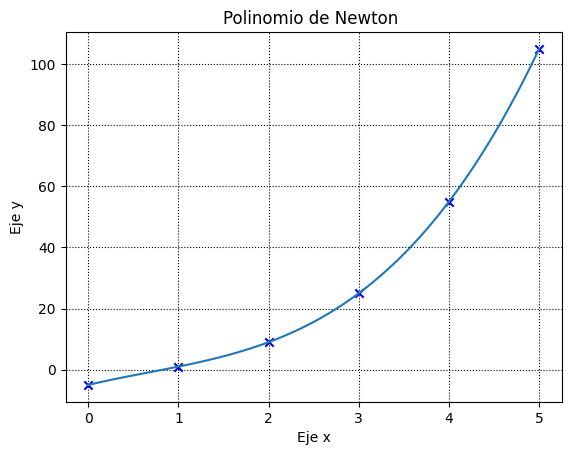

In [13]:

print("Tabla de diferencias y Grafica del Polinomio de Newton".center(150,"-"))
print(tabulate(dic,headers=titulos))#Imprimimos la tabla con los datos de x y las  diferencias
print("\nSi Xk= ",xk,"\nEl valor de F(xk)= ",yk,"\n")#imprimimos el valor de F(xk)

import matplotlib.pyplot as plt
plt.scatter(datx,daty,color="blue",marker="x")#se trazan los puntos para cada pareja ordenada (x,y) de la tabla
plt.plot(x1,g(x1))#se grafica la funcion g(x) en los datos de x dados
plt.title("Polinomio de Newton ")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.grid(color="black",linestyle="dotted")
plt.show()